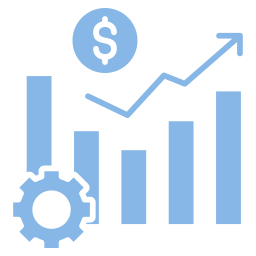

# **Sales Forecasting and Optimization**

## **Data Description**
This project uses historical retail sales data sourced from [Kaggle - Sales Forecasting Dataset](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting). The dataset (`train.csv`) contains 9,800 rows and 18 columns describing customer details, order information, product categories, and financial transactions. The goal of this project is to build a machine learning model that forecasts the **Sales** amount—our target variable—based on available features to support strategic decisions in sales optimization, inventory planning, and customer segmentation.
 
---

## **Data Dictionary**

| Column Name      | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| `Row ID`         | Unique numeric identifier for each row in the dataset.                      |
| `Order ID`       | Unique identifier for each order.                                           |
| `Order Date`     | The date when the order was placed. (Format: DD/MM/YYYY)                    |
| `Ship Date`      | The date when the order was shipped. (Format: DD/MM/YYYY)                   |
| `Ship Mode`      | Shipping method used (e.g., Second Class, Standard Class).                  |
| `Customer ID`    | Unique identifier for each customer.                                        |
| `Customer Name`  | Name of the customer who placed the order.                                  |
| `Segment`        | Customer segment (e.g., Consumer, Corporate, Home Office).                  |
| `Country`        | Country of the customer.                                                    |
| `City`           | City of the customer.                                                       |
| `State`          | State of the customer.                                                      |
| `Postal Code`    | Postal/ZIP code (may contain missing values).                              |
| `Region`         | Geographic region of the customer (e.g., West, South).                      |
| `Product ID`     | Unique identifier for each product.                                         |
| `Category`       | Main category of the product (e.g., Furniture, Office Supplies, Technology).|
| `Sub-Category`   | Sub-category of the product (e.g., Chairs, Labels).                         |
| `Product Name`   | Name of the product.                                                        |
| `Sales`          | 💡 **Target** — Sale amount (in USD) for the product line.                  |

---

## **Data Overview**

### **Importing Libraries**

In [1421]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime


### **Data Exploration**

In [1422]:
df=pd.read_csv('train.csv')

In [1423]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [1424]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [1425]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4593,4594,CA-2017-129868,26/12/2017,31/12/2017,Standard Class,MC-18130,Mike Caudle,Corporate,United States,Los Angeles,California,90004.0,West,OFF-AP-10004052,Office Supplies,Appliances,Hoover Replacement Belts For Soft Guard & Comm...,7.9


In [1426]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [1427]:
df.shape

(9800, 18)

In [1428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [1429]:
df.describe(exclude='object')

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [1430]:
df.describe(exclude='number')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


## **Data Preprocessing**

### **Checking duplicates**

`Checking duplicates on whole data`

In [1431]:
df.duplicated().sum()

0

`Checking duplicates on Row ID column`

In [1432]:
df.duplicated(subset='Row ID').sum()

0

### **Checking Nulls**

In [1433]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [1434]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.112245
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales            0.000000
dtype: float64


`As the percentage of nulls was 0.11% we decided to drop them`

In [1435]:
df = df.dropna(subset=['Postal Code'])

In [1436]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

### **Handling Outliers using IQR method**

**We checked the outliers on numerical columns in our data which are `Postal Code`,`Sales`**

In [1437]:
outliers_cols=['Postal Code','Sales']
for col in outliers_cols:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  lower_outliers = df[df[col] < (q1 - norm_range)]
  upper_outliers = df[df[col] > (q3 + norm_range)]
  outliers = len(lower_outliers)+len(upper_outliers)
  print(f"The number of outliers in {col} is : {outliers}")

The number of outliers in Postal Code is : 0
The number of outliers in Sales is : 1141


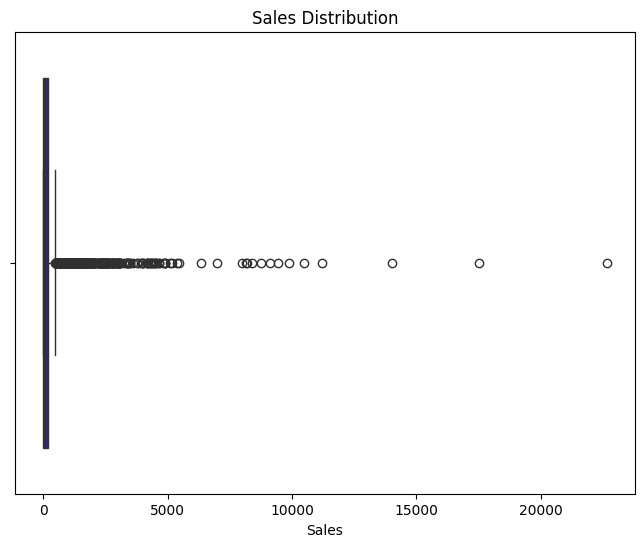

In [1438]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales'], color='#211C84')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()

In [1439]:
q1 = np.percentile(df['Sales'], 25)
q3 = np.percentile(df['Sales'], 75)
norm_range = (q3 - q1) * 1.5
df['Sales'] = np.where(df['Sales'] < (q1 - norm_range), q1 - norm_range, df['Sales'])
df['Sales'] = np.where(df['Sales'] > (q3 + norm_range), q3 + norm_range, df['Sales'])

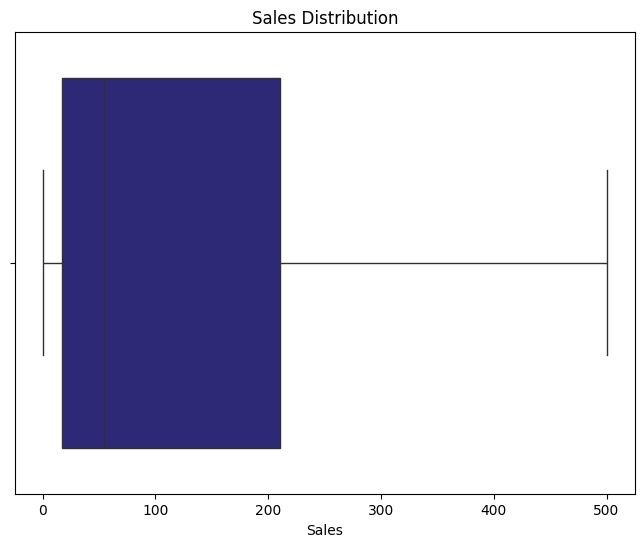

In [1440]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales'], color='#211C84')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()

### **Encoding**

##### **Checking unique values in Categorical columns**

In [1441]:
categorical_cols = ['Ship Mode', 'Segment', 'Country','City','State','Region','Category','Sub-Category','Product Name']
for col in categorical_cols:
    print(f"The number of unique values in {col}: {df[col].nunique()}")

The number of unique values in Ship Mode: 4
The number of unique values in Segment: 3
The number of unique values in Country: 1
The number of unique values in City: 529
The number of unique values in State: 48
The number of unique values in Region: 4
The number of unique values in Category: 3
The number of unique values in Sub-Category: 17
The number of unique values in Product Name: 1848


In [1442]:
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Unique values in Segment: ['Consumer' 'Corporate' 'Home Office']
Unique values in Country: ['United States']
Unique values in City: ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 

In [1443]:
for col in categorical_cols:
    print(f"Value counts in {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts in Ship Mode:
Ship Mode
Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: count, dtype: int64


Value counts in Segment:
Segment
Consumer       5096
Corporate      2948
Home Office    1745
Name: count, dtype: int64


Value counts in Country:
Country
United States    9789
Name: count, dtype: int64


Value counts in City:
City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: count, Length: 529, dtype: int64


Value counts in State:
State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia             

##### **Converting all text in the `Product Name` column to lowercase and removing punctuation**

In [1444]:
df['Product Name'] = df['Product Name'].str.lower().str.replace('[^\w\s]', '')

##### **Label encoding**

In [1445]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [1446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   int32  
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   int32  
 8   Country        9789 non-null   int32  
 9   City           9789 non-null   int32  
 10  State          9789 non-null   int32  
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   int32  
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   int32  
 15  Sub-Category   9789 non-null   int32  
 16  Product Name   9789 non-null   int32  
 17  Sales          9789 non-null   float64
dtypes: float64(2)

In [1447]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,2,CG-12520,Claire Gute,0,0,194,15,42420.0,2,FUR-BO-10001798,0,4,385,261.960
1,2,CA-2017-152156,08/11/2017,11/11/2017,2,CG-12520,Claire Gute,0,0,194,15,42420.0,2,FUR-CH-10000454,0,5,830,500.108
2,3,CA-2017-138688,12/06/2017,16/06/2017,2,DV-13045,Darrin Van Huff,1,0,265,3,90036.0,3,OFF-LA-10000240,1,10,1437,14.620
3,4,US-2016-108966,11/10/2016,18/10/2016,3,SO-20335,Sean O'Donnell,0,0,153,8,33311.0,2,FUR-TA-10000577,0,16,365,500.108
4,5,US-2016-108966,11/10/2016,18/10/2016,3,SO-20335,Sean O'Donnell,0,0,153,8,33311.0,2,OFF-ST-10000760,1,14,572,22.368


## **Feature Engineering**

**Converting the `Order Date` and `Ship Date` columns from string format to datetime**

In [1448]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

##### **1) Extracting specific components from the `Order Date` column :**
- `df['Year']`: extracts the year (e.g., 2016) from each order date.
- `df['Month']`: extracts the month as a number (1 to 12).
- `df['Day']`: extracts the day of the month (1 to 31).
- `df['Weekday']`: extracts the day of the week as an integer (0 = Monday, 6 = Sunday).

In [1449]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Weekday'] = df['Order Date'].dt.weekday

##### **2) Calculating the shipping duration from `Ship Date` and `Order Date`**

In [1450]:
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

##### **3) Calculating how many items are in each order using `Order ID` column**

In [1451]:
order_item_counts = df['Order ID'].value_counts()
df['Items per Order'] = df['Order ID'].map(order_item_counts)

##### **4) Calculating the total sales for each order using `Order ID` column**

In [1452]:
order_sales = df.groupby('Order ID')['Sales'].sum()
df['Total Order Sales'] = df['Order ID'].map(order_sales)

In [1453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9789 non-null   int64         
 1   Order ID           9789 non-null   object        
 2   Order Date         9789 non-null   datetime64[ns]
 3   Ship Date          9789 non-null   datetime64[ns]
 4   Ship Mode          9789 non-null   int32         
 5   Customer ID        9789 non-null   object        
 6   Customer Name      9789 non-null   object        
 7   Segment            9789 non-null   int32         
 8   Country            9789 non-null   int32         
 9   City               9789 non-null   int32         
 10  State              9789 non-null   int32         
 11  Postal Code        9789 non-null   float64       
 12  Region             9789 non-null   int32         
 13  Product ID         9789 non-null   object        
 14  Category     

In [1454]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Year', 'Month', 'Day', 'Weekday',
       'Shipping Duration', 'Items per Order', 'Total Order Sales'],
      dtype='object')

In [1455]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Year,Month,Day,Weekday,Shipping Duration,Items per Order,Total Order Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,2,CG-12520,Claire Gute,0,0,194,...,4,385,261.960,2017,11,8,2,3,2,762.068
1,2,CA-2017-152156,2017-11-08,2017-11-11,2,CG-12520,Claire Gute,0,0,194,...,5,830,500.108,2017,11,8,2,3,2,762.068
2,3,CA-2017-138688,2017-06-12,2017-06-16,2,DV-13045,Darrin Van Huff,1,0,265,...,10,1437,14.620,2017,6,12,0,4,1,14.620
3,4,US-2016-108966,2016-10-11,2016-10-18,3,SO-20335,Sean O'Donnell,0,0,153,...,16,365,500.108,2016,10,11,1,7,2,522.476
4,5,US-2016-108966,2016-10-11,2016-10-18,3,SO-20335,Sean O'Donnell,0,0,153,...,14,572,22.368,2016,10,11,1,7,2,522.476


## **Log Transformation of Sales Data**

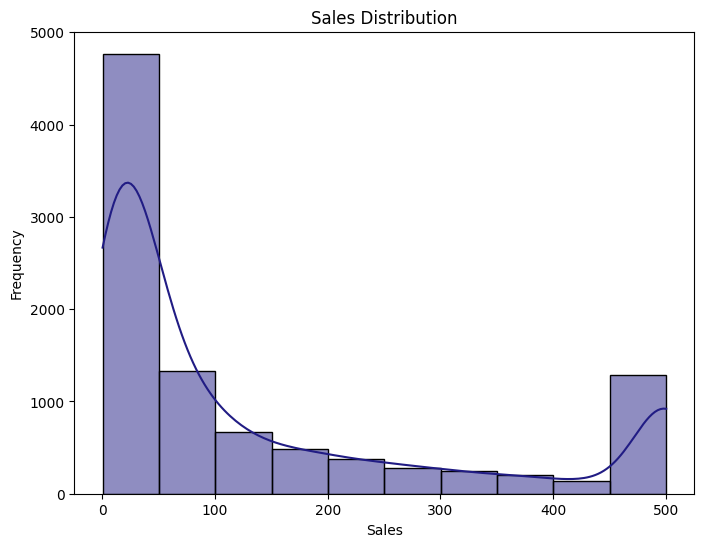

In [1456]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], kde=True, color='#211C84', bins=10)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [1457]:
df['Sales'] = np.log1p(df['Sales'])


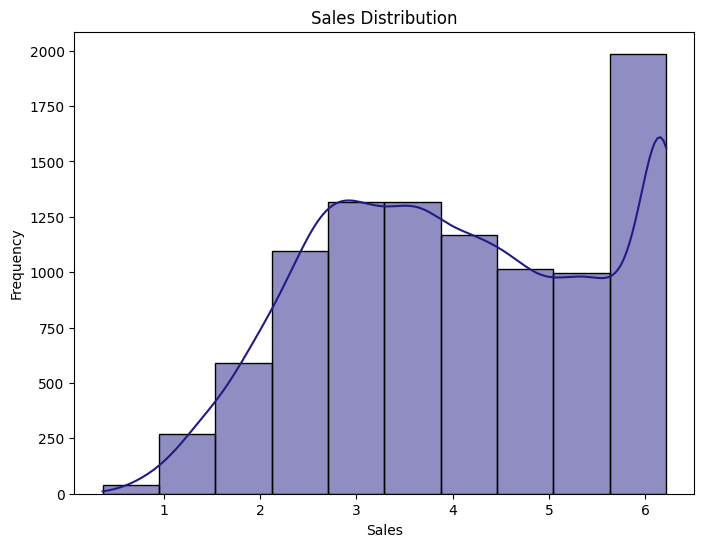

In [1458]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], kde=True, color='#211C84', bins=10)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

## **Feature Selection**

### **Dropping Unnecessary Columns**

In [1459]:
df = df.drop(['Row ID', 'Customer ID', 'Product ID','Customer Name','Order ID','Ship Date'], axis=1)

In [1460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Date         9789 non-null   datetime64[ns]
 1   Ship Mode          9789 non-null   int32         
 2   Segment            9789 non-null   int32         
 3   Country            9789 non-null   int32         
 4   City               9789 non-null   int32         
 5   State              9789 non-null   int32         
 6   Postal Code        9789 non-null   float64       
 7   Region             9789 non-null   int32         
 8   Category           9789 non-null   int32         
 9   Sub-Category       9789 non-null   int32         
 10  Product Name       9789 non-null   int32         
 11  Sales              9789 non-null   float64       
 12  Year               9789 non-null   int32         
 13  Month              9789 non-null   int32         
 14  Day          

In [1461]:
df.columns

Index(['Order Date', 'Ship Mode', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Year', 'Month', 'Day', 'Weekday', 'Shipping Duration',
       'Items per Order', 'Total Order Sales'],
      dtype='object')

In [1462]:
df.head()

,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Year,Month,Day,Weekday,Shipping Duration,Items per Order,Total Order Sales
0,2017-11-08,2,0,0,194,15,42420.0,2,0,4,385,5.572002,2017,11,8,2,3,2,762.068
1,2017-11-08,2,0,0,194,15,42420.0,2,0,5,830,6.216822,2017,11,8,2,3,2,762.068
2,2017-06-12,2,1,0,265,3,90036.0,3,1,10,1437,2.748552,2017,6,12,0,4,1,14.620
3,2016-10-11,3,0,0,153,8,33311.0,2,0,16,365,6.216822,2016,10,11,1,7,2,522.476
4,2016-10-11,3,0,0,153,8,33311.0,2,1,14,572,3.151368,2016,10,11,1,7,2,522.476


### **Correlation**

In [1463]:
correlations = df.corr()['Sales'].abs().drop('Sales').sort_values(ascending=False)
selected_features = correlations.head(35).index.tolist()
for col in correlations.index:   
    print(f"{col}: {round(correlations[col], 4)}")

Total Order Sales: 0.3811
Sub-Category: 0.1567
Region: 0.0497
State: 0.0313
City: 0.0281
Items per Order: 0.0202
Shipping Duration: 0.0138
Month: 0.012
Postal Code: 0.0086
Ship Mode: 0.007
Product Name: 0.0055
Category: 0.005
Year: 0.0047
Day: 0.0028
Weekday: 0.0025
Order Date: 0.0016
Segment: 0.0001
Country: nan


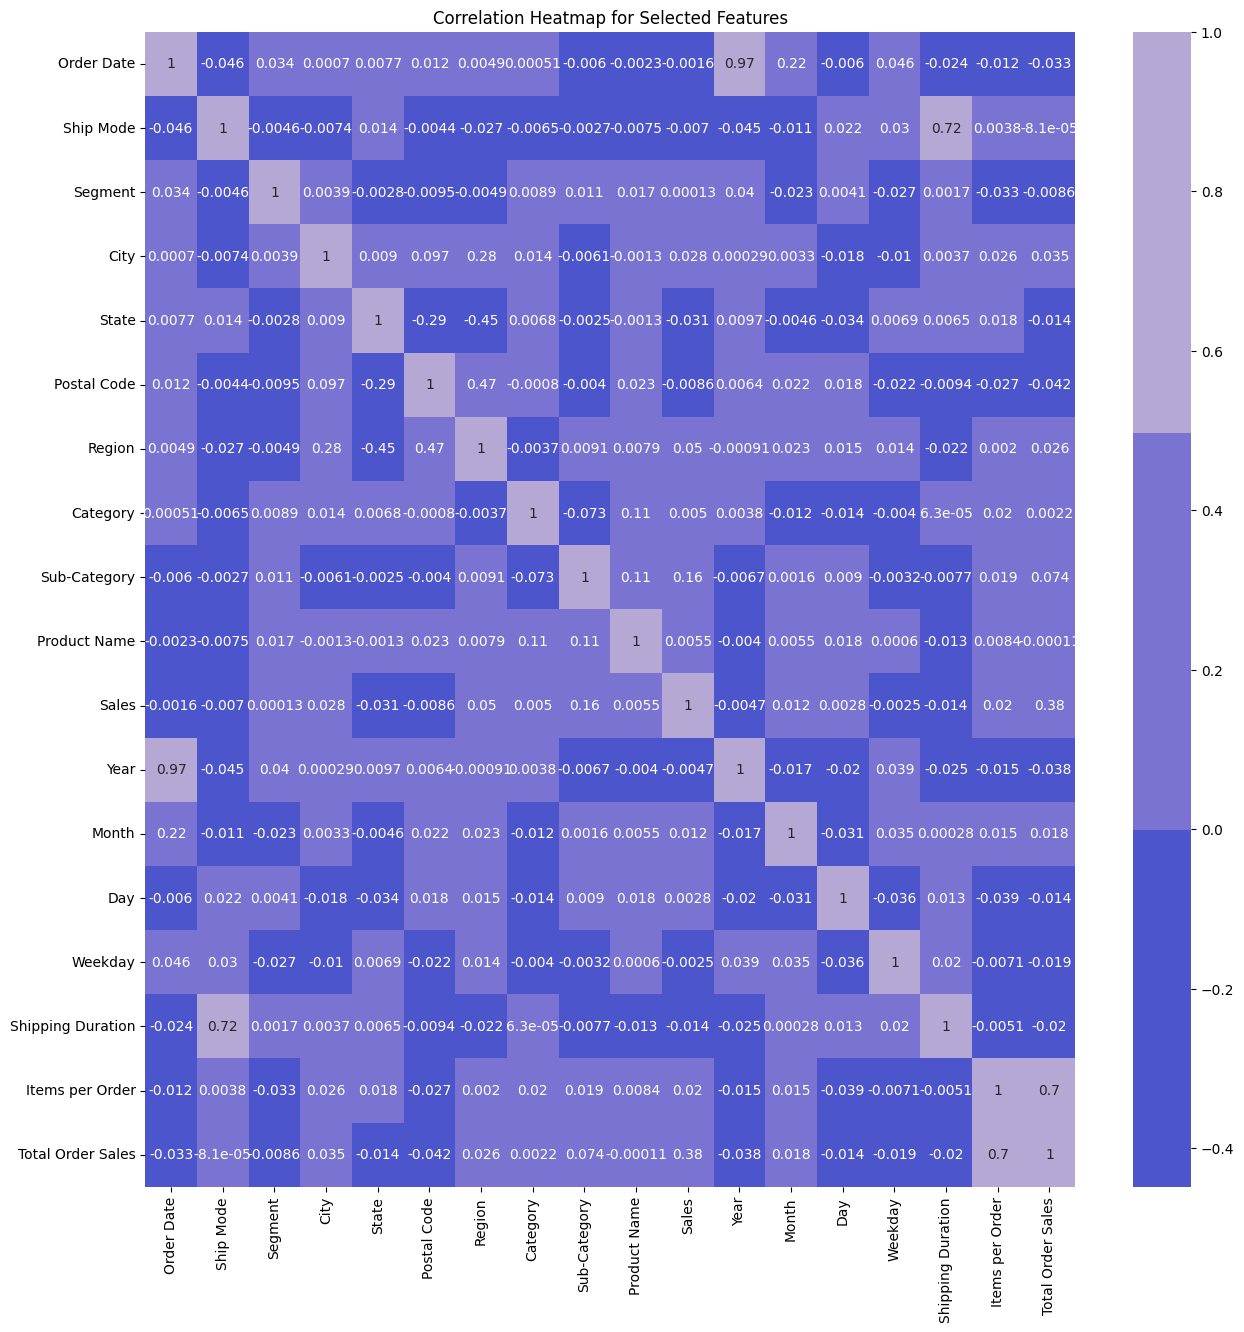

In [1464]:
df=df.drop('Country',axis=1)
custom_palette = ["#211C84", "#4D55CC", "#7A73D1", "#B5A8D5"]
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette(custom_palette, as_cmap=True), center=0)
plt.title('Correlation Heatmap for Selected Features')
plt.show()
